In [ ]:
## Ex1 Use data from Danmarks Statistik - Databanken
#1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol

#2. Open 'Konsol' and click 'Start Konsol'

#3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  #3.1. check the result
  #3.2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 

#

In [ ]:
"""
[
   {
      "id": "1",
      "description": "Borgere",
      "active": true,
      "hasSubjects": true,
      "subjects": []
   },
   {
      "id": "2",
      "description": "Arbejde og indkomst",
      "active": true,
      "hasSubjects": true,
      "subjects": []
   },
   {
      "id": "3",
      "description": "Økonomi",
      "active": true,
      "hasSubjects": true,
      "subjects": []
   },
   {
      "id": "4",
      "description": "Sociale forhold",
      "active": true,
      "hasSubjects": true,
      "subjects": []
   },
   {
      "id": "5",
      "description": "Uddannelse og forskning",
      "active": true,
      "hasSubjects": true,
      "subjects": []
   },
   {
      "id": "6",
      "description": "Erhvervsliv",
      "active": true,
      "hasSubjects": true,
      "subjects": []
   },
   {
      "id": "7",
      "description": "Transport",
      "active": true,
      "hasSubjects": true,
      "subjects": []
   },
   {
      "id": "8",
      "description": "Kultur og fritid",
      "active": true,
      "hasSubjects": true,
      "subjects": []
   },
   {
      "id": "9",
      "description": "Miljø og energi",
      "active": true,
      "hasSubjects": true,
      "subjects": []
   },
   {
      "id": "19",
      "description": "Tværgående",
      "active": true,
      "hasSubjects": true,
      "subjects": []
   }
]
"""

In [ ]:


# 4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
# Valgt: Hele landet, kvinder, 50 årige, Civilstand Enke, 1kvt 2008


In [ ]:
"""
URL: https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE(Head)=000&K%C3%98N(Head)=2&ALDER(Head)=50&CIVILSTAND=E&Tid=2008K1

CIVILSTAND;TID;OMRÅDE;KØN;ALDER;INDHOLD
Enke/enkemand;2008K1;Hele landet;Kvinder;50 år;850
"""

[432156, 552419]
Stigning i % af fraskilte i Danmark fra 4kvt 2008 til 4kvt 2020 er: 27.83%


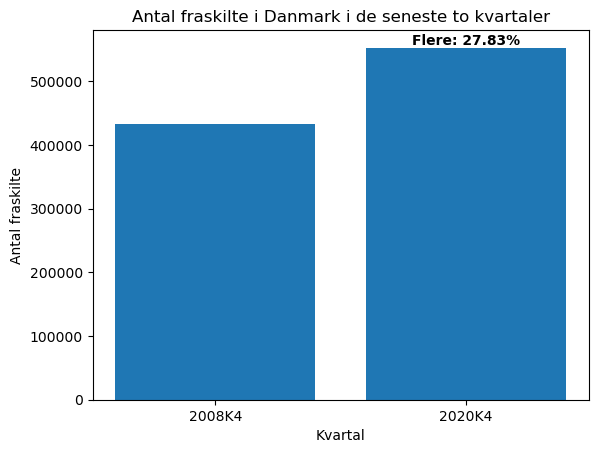

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


# 5. With data aggregation and data visualization answer the following questions:
  # 5.1. What is the change in pct of divorced danes from 2008 to 2020?
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=000&K%C3%98N=TOT&ALDER=IALT&Tid=2008K4%2C%2C2020K4&CIVILSTAND=F'

"""
Svar fra API:
OMRÅDE;KØN;ALDER;TID;CIVILSTAND;INDHOLD
Hele landet;I alt;I alt;2008K4;Fraskilt;432156
Hele landet;I alt;I alt;2020K4;Fraskilt;552419
"""

# Indlæs data fra URL'en i en Pandas DataFrame
df = pd.read_csv(url, delimiter=';')

# Brug loc funktionen til at finde de to værdier og gemme dem i en liste
values = [df.loc[df['TID'] == '2008K4']['INDHOLD'].values[0], 
          df.loc[df['TID'] == '2020K4']['INDHOLD'].values[0]]

print(values)  # Output: [432156, 552419]

increase_prct = (values[1] - values[0]) / values[0] * 100
print(f'Stigning i % af fraskilte i Danmark fra 4kvt 2008 til 4kvt 2020 er: {increase_prct:.2f}%')

labels = df['TID'].tolist()
increase_prct_label = f'Flere: {increase_prct:.2f}%'

plt.bar(labels, values)
plt.title('Antal fraskilte i Danmark i de seneste to kvartaler')
plt.xlabel('Kvartal')
plt.ylabel('Antal fraskilte')
plt.text(labels[1], values[1], increase_prct_label, ha='center', va='bottom', fontweight='bold')

plt.show()


[['København', 65.49], ['Aarhus', 59.94], ['Frederiksberg', 58.48], ['Odense', 55.2], ['Aalborg', 54.82]]


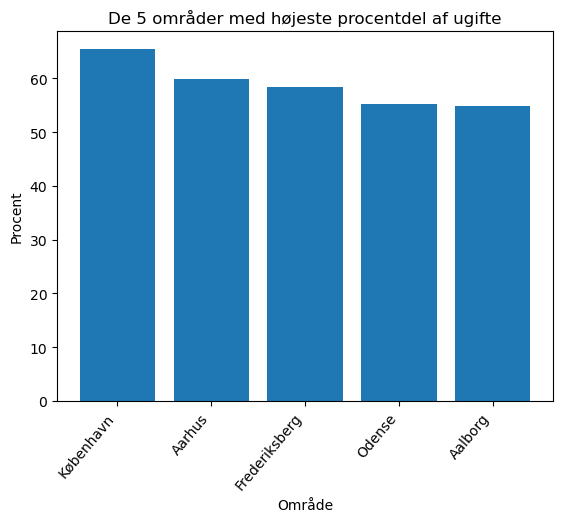

In [74]:
#  5.2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
 
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&K%C3%98N=TOT&ALDER=IALT&CIVILSTAND=*&Tid=2020K4'

# Indlæs data fra URL'en i en Pandas DataFrame
df = pd.read_csv(url, delimiter=';')

# Find de ugifte og gem i nyt df
df_2020_ugift = df[(df["TID"] == "2020K4") & (df["CIVILSTAND"] == "Ugift")]

# grupper den samlede befolkning pr område
total_population = df.groupby('OMRÅDE')['INDHOLD'].first().reset_index()

#Merge de 2 tabeller
ugift_percentage = df_2020_ugift.merge(total_population, on='OMRÅDE')

# Beregn antallet af personer, der aldrig har været gift, i hver bydel og gem i ny kolonne
ugift_percentage['Procent_Ugift'] = round(ugift_percentage['INDHOLD_x'] / ugift_percentage['INDHOLD_y'] * 100, 2)

# Gør bredden af framet større aht udskrift, hvis du vil udskrive ugift_percentage
pd.set_option('display.width', 100)

# Gem de 5 største i en liste
top_5 = ugift_percentage.nlargest(5, 'Procent_Ugift')[['OMRÅDE', 'Procent_Ugift']].values.tolist()
print(top_5)

# Konverter områdenavne til en liste og procentfordelinger til en anden liste
labels = [x[0] for x in top_5]
procent = [x[1] for x in top_5]

# Plot baren
plt.bar(labels, procent)

# Tilføj titler og labels
plt.title('De 5 områder med højeste procentdel af ugifte')
plt.xlabel('Område')
plt.ylabel('Procent')
plt.xticks(rotation=50, ha='right')
# Vis plottet
plt.show()



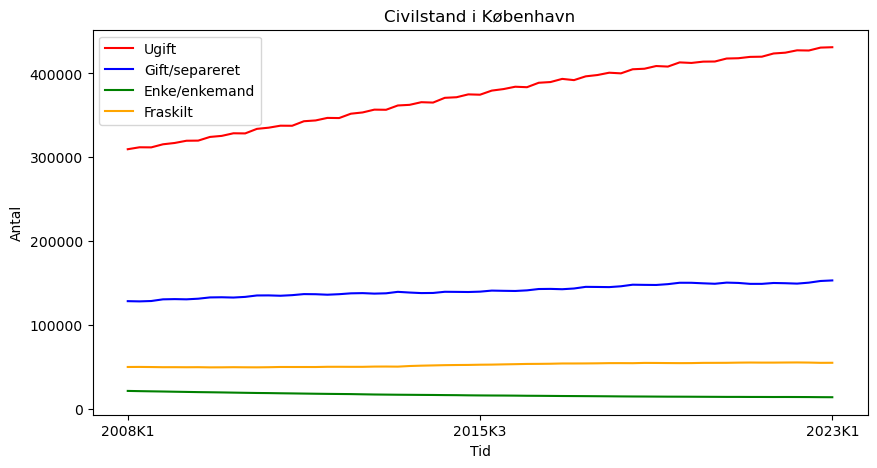

"\nfor df in df_list:\n    plt.plot(df['TID'], df['INDHOLD'])\n    xticks = [df['TID'].iloc[0], df['TID'].iloc[len(df['TID'])//2], df['TID'].iloc[-1]]\n    plt.xticks(xticks)\n    plt.title(df.iloc[0,1]+' I København')\n    plt.xlabel('Tid')\n    plt.ylabel('Antal')\n    plt.show()\n    \n"

In [121]:
#  5.3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&K%C3%98N=TOT&ALDER=IALT&CIVILSTAND=*&Tid=*'

# Indlæs data fra URL'en i en Pandas DataFrame
df = pd.read_csv(url, delimiter=';')

#Vælge det data du skal bruge
df = df[['TID', 'CIVILSTAND', 'INDHOLD']]

# Opdel DataFrame i mindre DataFrames for hver kategori
ugift = df[df['CIVILSTAND'] == 'Ugift']
gift = df[df['CIVILSTAND'] == 'Gift/separeret']
enke = df[df['CIVILSTAND'] == 'Enke/enkemand']
fraskilt = df[df['CIVILSTAND'] == 'Fraskilt']

#Læg dataframes i en liste når der skal plottes
df_list = (ugift,gift,enke,fraskilt)


# Angiv farverne for hver kategori
colors = ['red', 'blue', 'green', 'orange']

# Plot alle kategorier i samme figur
plt.figure(figsize=(10, 5))
for i, df in enumerate(df_list):
    plt.plot(df['TID'], df['INDHOLD'], color=colors[i], label=df.iloc[0,1])

plt.xticks([df['TID'].iloc[0], df['TID'].iloc[len(df['TID'])//2], df['TID'].iloc[-1]])
plt.xlabel('Tid')
plt.ylabel('Antal')
plt.title('Civilstand i København')
plt.legend()
plt.show()

#Hvis man vil have 4 grafer
"""
for df in df_list:
    plt.plot(df['TID'], df['INDHOLD'])
    xticks = [df['TID'].iloc[0], df['TID'].iloc[len(df['TID'])//2], df['TID'].iloc[-1]]
    plt.xticks(xticks)
    plt.title(df.iloc[0,1]+' I København')
    plt.xlabel('Tid')
    plt.ylabel('Antal')
    plt.show()
    
"""

    

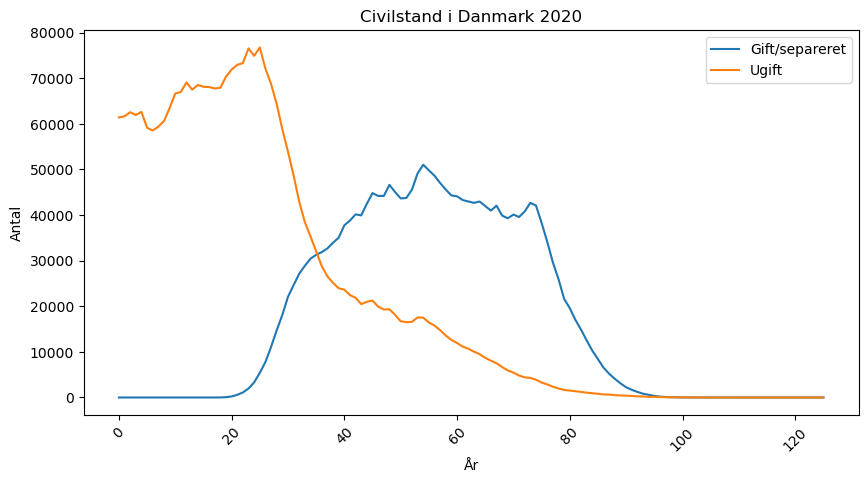

In [171]:
#  4. Show 2 plots in same figure: 'Gift/separeret' and 'Ugift' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
    
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=000&K%C3%98N=TOT&ALDER=*&CIVILSTAND=U%2CG&Tid=2020K4'

# Indlæs data fra URL'en i en Pandas DataFrame
df = pd.read_csv(url, delimiter=';')

# Vælg det data du skal bruge
df = df[['ALDER', 'CIVILSTAND', 'INDHOLD']]

#Fjerne felter med 'I alt'
df = df.loc[df['ALDER'] != 'I alt']

# Opdel DataFrame i mindre DataFrames for hver kategori
gift = df[df['CIVILSTAND'] == 'Gift/separeret'][['ALDER', 'INDHOLD']]
ugift = df[df['CIVILSTAND'] == 'Ugift'][['ALDER', 'INDHOLD']]

# Fjern 'år' tegnene i 'ALDER' kolonnen
gift['ALDER'] = gift['ALDER'].str.replace(' år', '')
ugift['ALDER'] = ugift['ALDER'].str.replace(' år', '')

# Sorter dataframes efter alder skal castes til int er default en string
gift['ALDER'] = gift['ALDER'].astype(int)
ugift['ALDER'] = ugift['ALDER'].astype(int)


# Plot begge kategorier i samme figur
plt.figure(figsize=(10, 5))
plt.plot(gift['ALDER'], gift['INDHOLD'], label='Gift/separeret')
plt.plot(ugift['ALDER'], ugift['INDHOLD'], label='Ugift')

plt.xlabel('År')
plt.ylabel('Antal')
plt.xticks(rotation=45)

plt.title('Civilstand i Danmark 2020')
plt.legend()
plt.show()



